In [194]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from scipy.stats import linregress
file = ("Data Sources\Master Data Frame.csv")
NFL = pd.read_csv(file)
NFL.head()

,Unnamed: 0,Rank,Winner,Loser,Points Winner,Points Loser,FAVORITE,SPREAD,UNDERDOG,H/A,...,Offensive Rank Loser,Defensive Rank Loser,4th Quarter Points Surrendered,Spread Winner,Spread Loser,Offensive Rank Spread Winner,Defensive Rank Spread Winner,Offensive Rank Spread Loser,Defensive Rank Spread Loser,4th Quarter Points Surrendered Spread Winner
0,0,1,Philadelphia Eagles,Atlanta Falcons,18,12,Atlanta Falcons,-1.0,Philadelphia Eagles,A,...,10.0,25.0,7.0,Philadelphia Eagles,Atlanta Falcons,18.0,12.0,10.0,25.0,7.0
1,1,2,Miami Dolphins,Tennessee Titans,27,20,Tennessee Titans,-1.0,Miami Dolphins,A,...,27.0,3.0,9.9,Miami Dolphins,Tennessee Titans,26.0,27.0,27.0,3.0,9.9
2,2,3,Pittsburgh Steelers,Cleveland Browns,21,21,Pittsburgh Steelers,-3.5,Cleveland Browns,A,...,20.0,21.0,7.7,Cleveland Browns,Cleveland Browns,20.0,21.0,20.0,21.0,6.2
3,3,4,New England Patriots,Houston Texans,27,20,New England Patriots,-6.0,Houston Texans,H,...,11.0,5.0,6.4,New England Patriots,Houston Texans,4.0,7.0,11.0,5.0,6.4
4,4,5,Minnesota Vikings,San Francisco 49ers,24,16,Minnesota Vikings,-6.0,San Francisco 49ers,H,...,21.0,28.0,6.1,Minnesota Vikings,San Francisco 49ers,19.0,9.0,21.0,28.0,6.1


In [195]:
favorite_spread_winner = []

for i in range(len(NFL)):
    
    if (NFL['FAVORITE'][i] == NFL['Winner'][i]):
        favorite_spread_winner.append("Yes")
    elif (NFL['UNDERDOG'][i]) == NFL['Winner'][i]:
        favorite_spread_winner.append("No")

NFL['Favorite Covers'] = favorite_spread_winner
NFL.head()

,Unnamed: 0,Rank,Winner,Loser,Points Winner,Points Loser,FAVORITE,SPREAD,UNDERDOG,H/A,...,Defensive Rank Loser,4th Quarter Points Surrendered,Spread Winner,Spread Loser,Offensive Rank Spread Winner,Defensive Rank Spread Winner,Offensive Rank Spread Loser,Defensive Rank Spread Loser,4th Quarter Points Surrendered Spread Winner,Favorite Covers
0,0,1,Philadelphia Eagles,Atlanta Falcons,18,12,Atlanta Falcons,-1.0,Philadelphia Eagles,A,...,25.0,7.0,Philadelphia Eagles,Atlanta Falcons,18.0,12.0,10.0,25.0,7.0,No
1,1,2,Miami Dolphins,Tennessee Titans,27,20,Tennessee Titans,-1.0,Miami Dolphins,A,...,3.0,9.9,Miami Dolphins,Tennessee Titans,26.0,27.0,27.0,3.0,9.9,No
2,2,3,Pittsburgh Steelers,Cleveland Browns,21,21,Pittsburgh Steelers,-3.5,Cleveland Browns,A,...,21.0,7.7,Cleveland Browns,Cleveland Browns,20.0,21.0,20.0,21.0,6.2,Yes
3,3,4,New England Patriots,Houston Texans,27,20,New England Patriots,-6.0,Houston Texans,H,...,5.0,6.4,New England Patriots,Houston Texans,4.0,7.0,11.0,5.0,6.4,Yes
4,4,5,Minnesota Vikings,San Francisco 49ers,24,16,Minnesota Vikings,-6.0,San Francisco 49ers,H,...,28.0,6.1,Minnesota Vikings,San Francisco 49ers,19.0,9.0,21.0,28.0,6.1,Yes


In [196]:
MGN = NFL["Margin of Victory"]
OFFRNK = NFL["Offensive Rank Winner"]
DEFRNK = NFL["Defensive Rank Winner"]
OFFRNK_L = NFL["Offensive Rank Loser"]
DEFRNK_L = NFL["Defensive Rank Loser"]
Q = NFL["4th Quarter Points Surrendered"]
SPREAD = NFL["SPREAD"]*-1
FAV_COV = NFL["Favorite Covers"]
OFFENSE_SPLIT = OFFRNK -OFFRNK_L

In [197]:
Fav = NFL.groupby('Favorite Covers')['SPREAD'].size()
Fav = NFL.groupby(['Favorite Covers','SPREAD']).size()
Fav


Favorite Covers  SPREAD
No               -16.5      1
                 -13.5      1
                 -13.0      1
                 -10.0      2
                 -9.5       2
                 -7.5       4
                 -7.0       6
                 -6.5       5
                 -6.0       1
                 -5.5       2
                 -4.5       4
                 -4.0       9
                 -3.5       6
                 -3.0      18
                 -2.5       7
                 -2.0       5
                 -1.5       4
                 -1.0       9
Yes              -17.0      1
                 -16.5      1
                 -15.0      1
                 -14.0      6
                 -13.5      3
                 -12.5      3
                 -12.0      2
                 -11.0      1
                 -10.5      1
                 -10.0      5
                 -9.5       9
                 -9.0       5
                 -8.5       4
                 -8.0       1
                

In [198]:
NFL["Offense Variance"] = OFFENSE_SPLIT*-1
NFL.head()

,Unnamed: 0,Rank,Winner,Loser,Points Winner,Points Loser,FAVORITE,SPREAD,UNDERDOG,H/A,...,4th Quarter Points Surrendered,Spread Winner,Spread Loser,Offensive Rank Spread Winner,Defensive Rank Spread Winner,Offensive Rank Spread Loser,Defensive Rank Spread Loser,4th Quarter Points Surrendered Spread Winner,Favorite Covers,Offense Variance
0,0,1,Philadelphia Eagles,Atlanta Falcons,18,12,Atlanta Falcons,-1.0,Philadelphia Eagles,A,...,7.0,Philadelphia Eagles,Atlanta Falcons,18.0,12.0,10.0,25.0,7.0,No,-8.0
1,1,2,Miami Dolphins,Tennessee Titans,27,20,Tennessee Titans,-1.0,Miami Dolphins,A,...,9.9,Miami Dolphins,Tennessee Titans,26.0,27.0,27.0,3.0,9.9,No,1.0
2,2,3,Pittsburgh Steelers,Cleveland Browns,21,21,Pittsburgh Steelers,-3.5,Cleveland Browns,A,...,7.7,Cleveland Browns,Cleveland Browns,20.0,21.0,20.0,21.0,6.2,Yes,14.0
3,3,4,New England Patriots,Houston Texans,27,20,New England Patriots,-6.0,Houston Texans,H,...,6.4,New England Patriots,Houston Texans,4.0,7.0,11.0,5.0,6.4,Yes,7.0
4,4,5,Minnesota Vikings,San Francisco 49ers,24,16,Minnesota Vikings,-6.0,San Francisco 49ers,H,...,6.1,Minnesota Vikings,San Francisco 49ers,19.0,9.0,21.0,28.0,6.1,Yes,2.0


In [199]:
fav_wins = NFL.loc[NFL['Favorite Covers'] == "Yes"]
dog_wins = NFL.loc[NFL['Favorite Covers'] == "No"]

[]

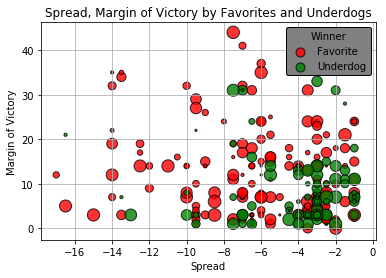

In [201]:
plt.scatter(fav_wins['SPREAD'],fav_wins['Margin of Victory'], s=OFFRNK*5,color='red', edgecolors='black', alpha=.8, label="Favorite")
plt.scatter(dog_wins['SPREAD'],dog_wins['Margin of Victory'], s=OFFRNK*5,color='green', edgecolors='black', alpha=.8, label="Underdog")

# Incorporate the other graph properties
plt.grid()
plt.title("Spread, Margin of Victory by Favorites and Underdogs")
plt.ylabel("Margin of Victory")
plt.xlabel("Spread")


# Create a legend
legend = plt.legend(title="Winner")
frame = legend.get_frame() #sets up for color, edge, and transparency
frame.set_facecolor('grey') #color of legend
frame.set_edgecolor('black') #edge color of legend
frame.set_alpha(1) #deals with transparency
plt.savefig("Images/Favorites & Dogs.png")
plt.plot()

In [192]:
#Regression Data
# Set line
(slope, intercept, _, _, _) = linregress(MGN, OFFRNK)
fit = slope * MGN + intercept

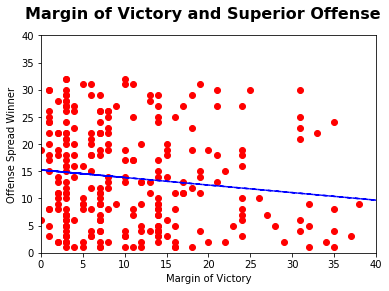

In [202]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Margin of Victory and Superior Offense", fontsize=16, fontweight="bold")

ax.set_xlim(0, 40)
ax.set_ylim(0, 40)

ax.set_xlabel("Margin of Victory")
ax.set_ylabel("Offense Spread Winner")

ax.plot(MGN, OFFRNK, linewidth=0, marker='o', color='red')
ax.plot(MGN, fit, 'b--')
plt.savefig("Images/Regression.png")
plt.show()